In [ ]:


!pip install pandas matplotlib seaborn mlxtend


import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Sample retail sales dataset (replace with your actual data)
data = {
    'TransactionID': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5],
    'Item': ['Milk', 'Bread', 'Eggs', 'Milk', 'Diapers', 'Milk', 'Bread', 'Beer', 'Bread', 'Eggs', 'Milk', 'Beer']
}
df = pd.DataFrame(data)

# Create a one-hot encoded DataFrame for Apriori algorithm
basket = (df.groupby(['TransactionID', 'Item'])['Item']
          .count().unstack().reset_index().fillna(0)
          .set_index('TransactionID'))

# Convert values to 0 or 1 (presence or absence of item)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the rules
print(rules)

# Example: Find items frequently bought together with "Milk"
milk_rules = rules[rules['antecedents'].apply(lambda x: 'Milk' in x)]
print("\nItems frequently bought with Milk:")
milk_rules


<ipython-input-1-f872344fd5ea>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      antecedents    consequents  antecedent support  consequent support  \
0          (Milk)         (Beer)                 0.8                 0.4   
1          (Beer)         (Milk)                 0.4                 0.8   
2         (Bread)         (Eggs)                 0.6                 0.4   
3          (Eggs)        (Bread)                 0.4                 0.6   
4       (Diapers)         (Milk)                 0.2                 0.8   
5          (Milk)      (Diapers)                 0.8                 0.2   
6   (Bread, Milk)         (Beer)                 0.4                 0.4   
7   (Bread, Beer)         (Milk)                 0.2                 0.8   
8          (Milk)  (Bread, Beer)                 0.8                 0.2   
9          (Beer)  (Bread, Milk)                 0.4                 0.4   
10  (Bread, Milk)         (Eggs)                 0.4                 0.4   
11   (Milk, Eggs)        (Bread)                 0.2                 0.6   
12        (B

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Milk),(Beer),0.8,0.4,0.4,0.50,1.250000,1.0,0.08,1.200000,1.000000,0.500000,0.166667,0.750000
5,(Milk),(Diapers),0.8,0.2,0.2,0.25,1.250000,1.0,0.04,1.066667,1.000000,0.250000,0.062500,0.625000
6,"(Bread, Milk)",(Beer),0.4,0.4,0.2,0.50,1.250000,1.0,0.04,1.200000,0.333333,0.333333,0.166667,0.500000
8,(Milk),"(Bread, Beer)",0.8,0.2,0.2,0.25,1.250000,1.0,0.04,1.066667,1.000000,0.250000,0.062500,0.625000
10,"(Bread, Milk)",(Eggs),0.4,0.4,0.2,0.50,1.250000,1.0,0.04,1.200000,0.333333,0.333333,0.166667,0.500000
11,"(Milk, Eggs)",(Bread),0.2,0.6,0.2,1.00,1.666667,1.0,0.08,inf,0.500000,0.333333,1.000000,0.666667


In [ ]:
!pip install mlxtend


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
data = {
    'TransactionID': [1,2,3,4, 5],
    'Item': [[ 'Bread','Milk'], ['Bread', 'Diapers','Beer','Eggs'], ['Milk', 'Diapers', 'Beer','Coke'], ['Bread', 'Milk','Diapers','Beer'], ['Bread','Milk', 'Diapers','Coke']]
}

In [ ]:
df = pd.DataFrame(data)


In [ ]:
df = df.explode('Item', ignore_index=True)


In [ ]:
basket = (df.groupby(['TransactionID', 'Item'])['Item']
          .count().unstack().reset_index().fillna(0)
          .set_index('TransactionID'))


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


In [ ]:
basket_sets = basket.applymap(encode_units)


<ipython-input-18-3441ec1a8016>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.2, use_colnames=True)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
print(rules)


        antecedents             consequents  antecedent support  \
0         (Diapers)                  (Beer)                 0.8   
1            (Beer)               (Diapers)                 0.6   
2            (Beer)                  (Eggs)                 0.6   
3            (Eggs)                  (Beer)                 0.2   
4           (Bread)                  (Eggs)                 0.8   
..              ...                     ...                 ...   
83    (Coke, Bread)         (Milk, Diapers)                 0.2   
84  (Milk, Diapers)           (Coke, Bread)                 0.6   
85           (Coke)  (Bread, Milk, Diapers)                 0.4   
86           (Milk)  (Coke, Bread, Diapers)                 0.8   
87        (Diapers)     (Coke, Bread, Milk)                 0.8   

    consequent support  support  confidence      lift  representativity  \
0                  0.6      0.6    0.750000  1.250000               1.0   
1                  0.8      0.6    1.000000  

In [ ]:
# Example: Find items frequently bought together with "Milk"
milk_rules = rules[rules['antecedents'].apply(lambda x: 'Milk' in x)]
print("\nItems frequently bought with Milk:")
milk_rules



Items frequently bought with Milk:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
9,(Milk),(Coke),0.8,0.4,0.4,0.500000,1.250000,1.0,0.08,1.200000,1.000000,0.500000,0.166667,0.750000
25,"(Milk, Beer)",(Coke),0.4,0.4,0.2,0.500000,1.250000,1.0,0.04,1.200000,0.333333,0.333333,0.166667,0.500000
27,(Milk),"(Coke, Beer)",0.8,0.2,0.2,0.250000,1.250000,1.0,0.04,1.066667,1.000000,0.250000,0.062500,0.625000
34,"(Milk, Diapers)",(Beer),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.200000,0.250000,0.500000,0.166667,0.666667
35,"(Milk, Beer)",(Diapers),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
41,(Milk),"(Coke, Bread)",0.8,0.2,0.2,0.250000,1.250000,1.0,0.04,1.066667,1.000000,0.250000,0.062500,0.625000
48,"(Coke, Milk)",(Diapers),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
50,"(Milk, Diapers)",(Coke),0.6,0.4,0.4,0.666667,1.666667,1.0,0.16,1.800000,1.000000,0.666667,0.444444,0.833333
52,(Milk),"(Coke, Diapers)",0.8,0.4,0.4,0.500000,1.250000,1.0,0.08,1.200000,1.000000,0.500000,0.166667,0.750000
68,"(Bread, Milk, Beer)",(Diapers),0.2,0.8,0.2,1.000000,1.250000,1.0,0.04,inf,0.250000,0.250000,1.000000,0.625000


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample Retail Sales Data (Transaction format)
# Let's assume each row represents a transaction, with items being purchased.
# You will need to load your actual retail sales data into a pandas DataFrame
# where each column represents a unique item (True/False for whether it's purchased).

# Sample data: A simple dataset
data = {
    'Milk': [1, 0, 1, 1, 0],
    'Bread': [1, 1, 1, 1, 1],
    'Butter': [0, 1, 1, 0, 1],
    'Cheese': [0, 0, 1, 1, 0],
    'Yogurt': [1, 1, 0, 0, 1],
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Apply the Apriori algorithm
# The `min_support` value indicates the minimum support for an itemset to be considered frequent
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Show the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Now, generate the association rules from these frequent itemsets
# `min_threshold` is the minimum confidence level (you can adjust this threshold)
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Show the generated association rules
print("\nAssociation Rules:")
print(association_rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Optionally, you can sort the rules based on a metric, like lift or confidence
sorted_rules = association_rules_df.sort_values(by='lift', ascending=False)
print("\nSorted Association Rules by Lift:")
print(sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
   support         itemsets
0      0.6           (Milk)
1      1.0          (Bread)
2      0.6         (Butter)
3      0.6         (Yogurt)
4      0.6    (Bread, Milk)
5      0.6  (Bread, Butter)
6      0.6  (Bread, Yogurt)

Association Rules:
  antecedents consequents  support  confidence  lift
0      (Milk)     (Bread)      0.6         1.0   1.0
1    (Butter)     (Bread)      0.6         1.0   1.0
2    (Yogurt)     (Bread)      0.6         1.0   1.0

Sorted Association Rules by Lift:
  antecedents consequents  support  confidence  lift
0      (Milk)     (Bread)      0.6         1.0   1.0
1    (Butter)     (Bread)      0.6         1.0   1.0
2    (Yogurt)     (Bread)      0.6         1.0   1.0


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [ ]:
dataset=pd.read_csv("/content/retail_sales_dataset.csv")

In [ ]:
dataset

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
# prompt: Using dataframe dataset: generate the code using association rule mining technique on retail sales dataset and make apriori combination of frequently bought item

# Install necessary libraries if not already installed
# !pip install mlxtend

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming your dataset is in a pandas DataFrame called 'dataset'
# We need to transform the data into a list of transactions, where each transaction is a list of items purchased together.

# Group transactions by Transaction ID and aggregate items into a list
transactions = dataset.groupby('Transaction ID')['Product Category'].apply(list).tolist()

# Use TransactionEncoder to convert the transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the resulting association rules
rules

# You can then further analyze these rules to identify patterns of frequently bought items
# For example, you can filter the rules by lift and confidence to find the strongest relationships.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [ ]:
# Import required libraries


# Step 1: Load and Explore the Data (EDA)
# Load your dataset - Replace this with your actual dataset file path
# Let's assume it's a CSV file where each row is a transaction with items purchased

# Display the first few rows of the data

# Check basic info about the dataset

# Check for missing values

# If the data contains item names in each row as a string, we'll need to preprocess it
# Example: ['milk', 'bread', 'butter'] - Convert it into a list format for further processing.

# Step 2: Data Preprocessing - Convert to Transaction Format
# Assuming the dataset has columns like 'TransactionID' and 'Item'
# Convert it into a format where each row represents items bought in one transaction

# Example:
# TransactionID | Item
# 1             | Milk
# 1             | Bread
# 2             | Milk
# 3             | Butter
# 3             | Cheese

# Preprocess the dataset into a list of transactions (each list represents items bought in a single transaction)

# Step 3: Apply Apriori Algorithm
# Convert transaction data into a one-hot encoded format (True/False for each item per transaction)


# Now, apply Apriori algorithm to find frequent itemsets with min_support=0.05 (for example)

# Display frequent itemsets

# Step 4: Generate Association Rules
# Generate association rules with a minimum confidence of 0.7

# Display the generated association rules

# Step 5: Visualization (Optional)
# Visualize the frequent itemsets

# Step 6: Sort and Display the Best Association Rules (Optional)
# Sort the rules based on lift (a metric to measure strength of association)

# Display top 5 association rules


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


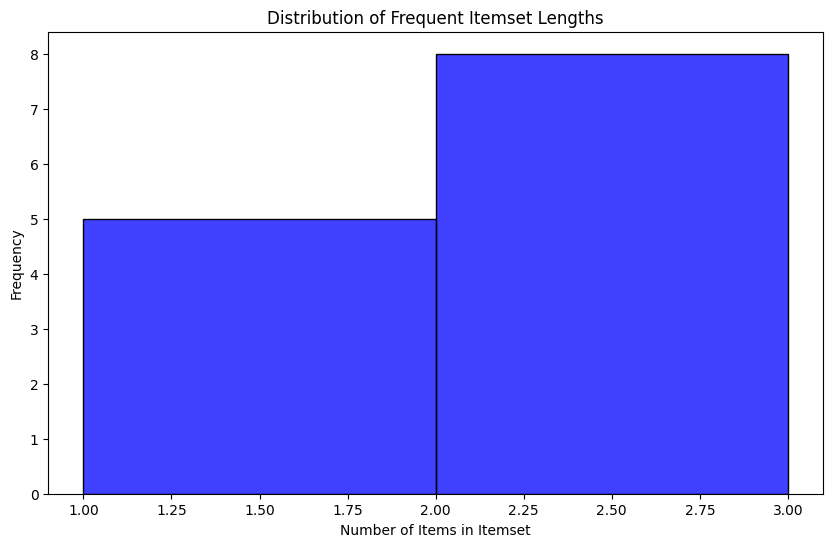

In [ ]:
plt.figure(figsize=(10, 6))
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
sns.histplot(frequent_itemsets['length'], kde=False, color='blue', bins=range(1, frequent_itemsets['length'].max() + 1))
plt.title('Distribution of Frequent Itemset Lengths')
plt.xlabel('Number of Items in Itemset')
plt.ylabel('Frequency')
plt.show()


In [ ]:
sorted_rules = rules.sort_values(by='lift', ascending=False)


In [ ]:
print("\nTop 5 Association Rules sorted by Lift:")
print(sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())



Top 5 Association Rules sorted by Lift:
     antecedents   consequents  support  confidence      lift
3         (Eggs)       (Bread)      0.4    1.000000  1.666667
2        (Bread)        (Eggs)      0.4    0.666667  1.666667
11  (Milk, Eggs)       (Bread)      0.2    1.000000  1.666667
12       (Bread)  (Milk, Eggs)      0.2    0.333333  1.666667
1         (Beer)        (Milk)      0.4    1.000000  1.250000
